<a href="https://colab.research.google.com/github/karthebans/Research/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthy, Faulty Detection with vibration Sensors data

In [3]:
import os
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,make_scorer, f1_score

# DL Libraries
import tensorflow
import tensorflow as tf
from keras.models import Model
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

# Visualisation Libraries
import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# set random seed
seed(10)
tensorflow.random.set_seed(10)

# Data loading and pre-processing

In [4]:
df_healthy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/HealthyDataset.csv')

In [5]:
df_healthy.columns = ['sensor_1', 'sensor_2','sensor_3','sensor_4']

In [6]:
df_healthy['target'] = 1

In [7]:
df_healthy.shape

(99839, 5)

In [8]:
df_faulty = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/FaultyDataset.csv')

In [9]:
df_faulty.columns = ['sensor_1', 'sensor_2','sensor_3','sensor_4']

In [10]:
df_faulty['target'] = 0

In [11]:
df_faulty.shape

(94207, 5)

In [12]:
df_combined = pd.concat([df_healthy, df_faulty], axis=0)

In [13]:
df_combined

,sensor_1,sensor_2,sensor_3,sensor_4,target
0,-9.94,8.530,7.550,4.7000,1
1,21.40,-4.740,-0.278,5.9500,1
2,8.52,-0.593,1.260,3.6400,1
3,-21.10,-0.558,8.980,0.0193,1
4,3.84,2.490,-4.130,2.5000,1
...,...,...,...,...,...
94202,-1.46,2.780,-1.150,-4.5400,0
94203,-3.88,0.854,6.420,-5.4700,0
94204,1.73,4.070,5.360,0.2160,0
94205,8.98,10.100,1.550,3.6600,0


In [14]:
df_combined.shape

(194046, 5)

In [15]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194046 entries, 0 to 94206
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sensor_1  194046 non-null  float64
 1   sensor_2  194046 non-null  float64
 2   sensor_3  194046 non-null  float64
 3   sensor_4  194046 non-null  float64
 4   target    194046 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 8.9 MB


In [16]:
df_combined.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,target
count,194046.000000,194046.000000,194046.000000,194046.000000,194046.000000
mean,-0.001394,-0.001094,0.001083,0.007286,0.514512
std,6.689823,4.488594,4.218810,4.890929,0.499791
min,-50.800000,-28.600000,-27.000000,-31.300000,0.000000
25%,-3.720000,-2.570000,-2.370000,-2.700000,0.000000
50%,-0.184000,0.119000,0.069950,0.202000,1.000000
75%,3.530000,2.750000,2.440000,2.860000,1.000000
max,52.700000,28.400000,25.100000,33.400000,1.000000


#### It is seen from the above the min and max value for the 4 sensors more are less equal.

In [17]:
df_combined.isna().sum()

sensor_1    0
sensor_2    0
sensor_3    0
sensor_4    0
target      0
dtype: int64

#### No Missing values in the data set

# Visualisation Analysis

In [18]:
def plot_histogram(sensor_no, color):
    fig, ax = plt.subplots(figsize=(25, 6), dpi=80)
    ax.hist(df_combined[sensor_no], bins=50, label=sensor_no, color=color, animated = True, linewidth=3)
    plt.legend(loc='upper right')
    ax.set_title(f'Distribution of Vibration {sensor_no} data', fontsize=16)
    plt.show()

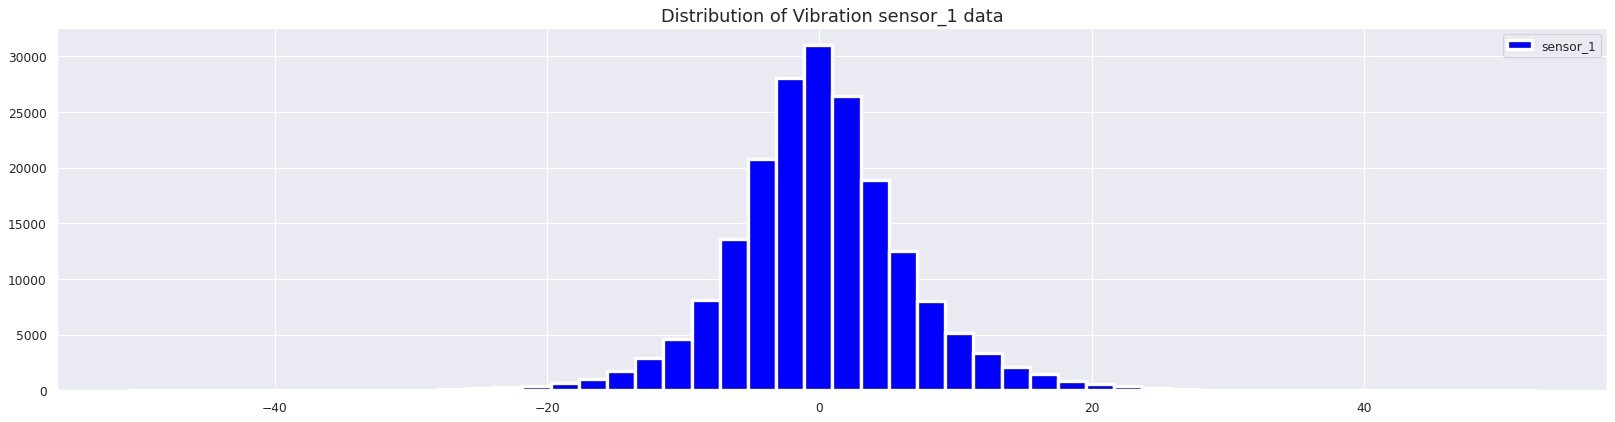

In [19]:
plot_histogram('sensor_1', 'blue')

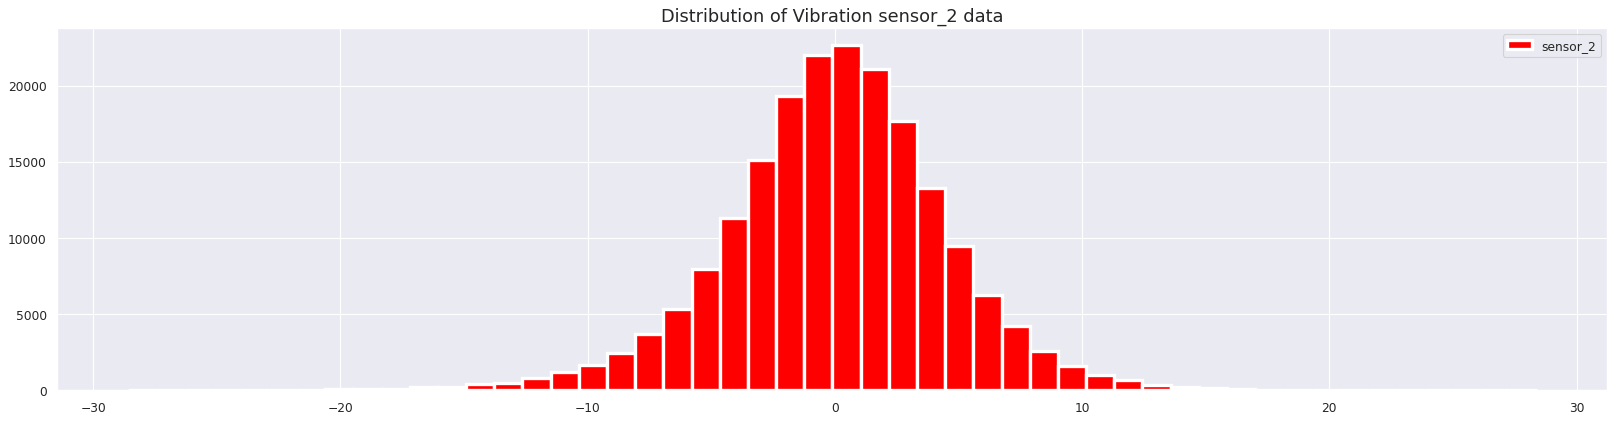

In [20]:
plot_histogram('sensor_2', 'red')

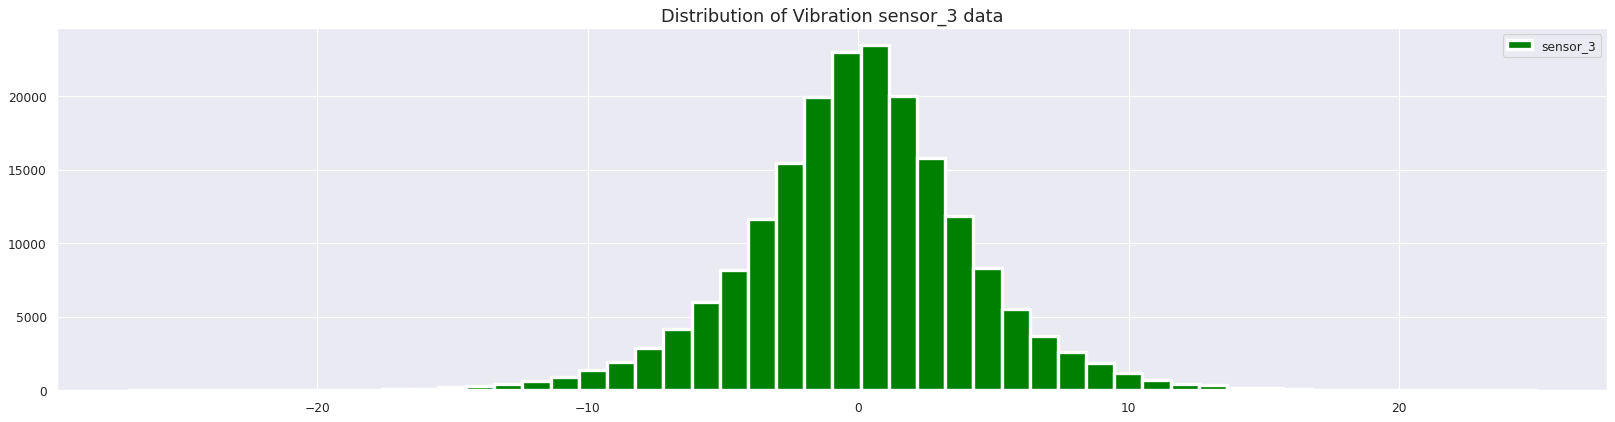

In [21]:
plot_histogram('sensor_3', 'green')

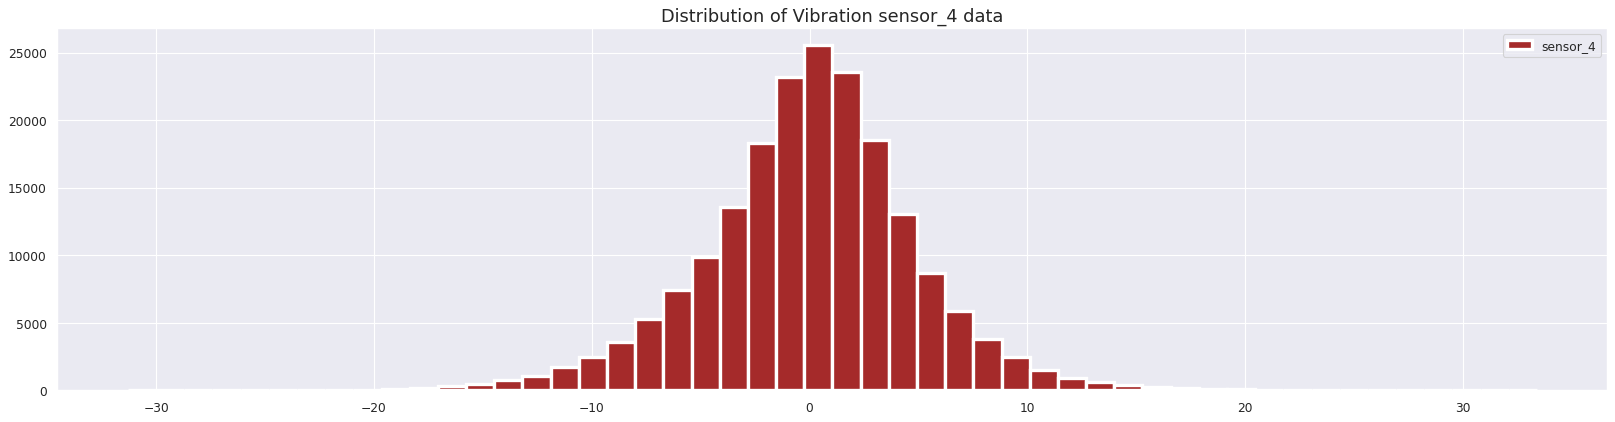

In [22]:
plot_histogram('sensor_4', 'brown')

#### As per the histogram the data seems to be normally distributed for 4 sensors

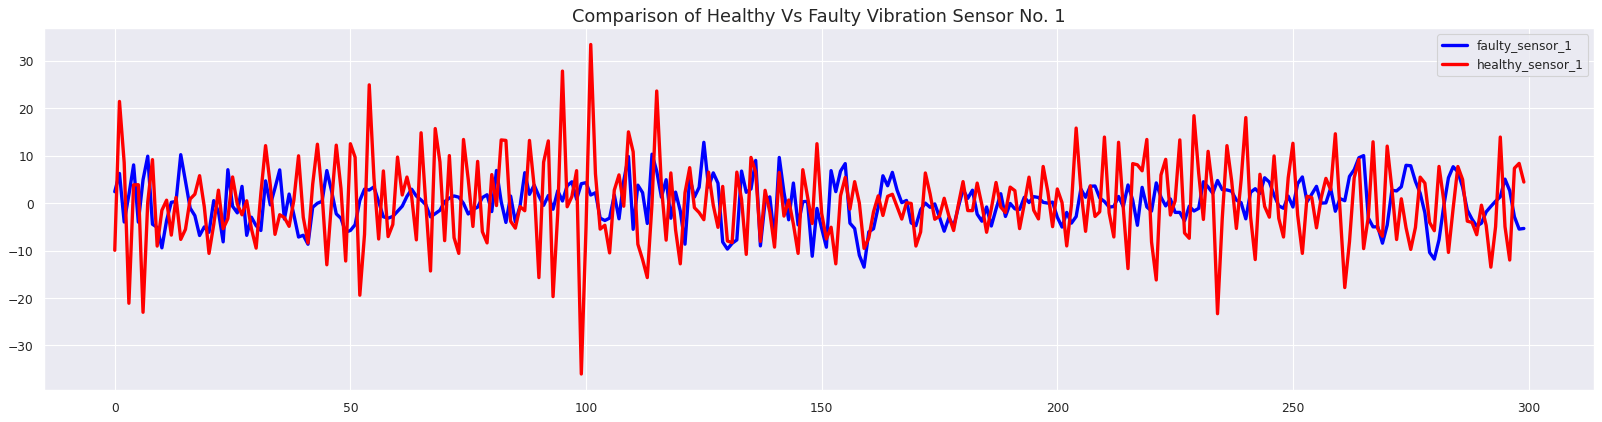

In [23]:
fig, ax = plt.subplots(figsize=(25, 6), dpi=80)
ax.plot(df_faulty['sensor_1'][:300], label='faulty_sensor_1', color='blue', animated = True, linewidth=3)
ax.plot(df_healthy['sensor_1'][:300], label='healthy_sensor_1', color='red', animated = True, linewidth=3)
plt.legend(loc='upper right')
ax.set_title('Comparison of Healthy Vs Faulty Vibration Sensor No. 1', fontsize=16)
plt.show()

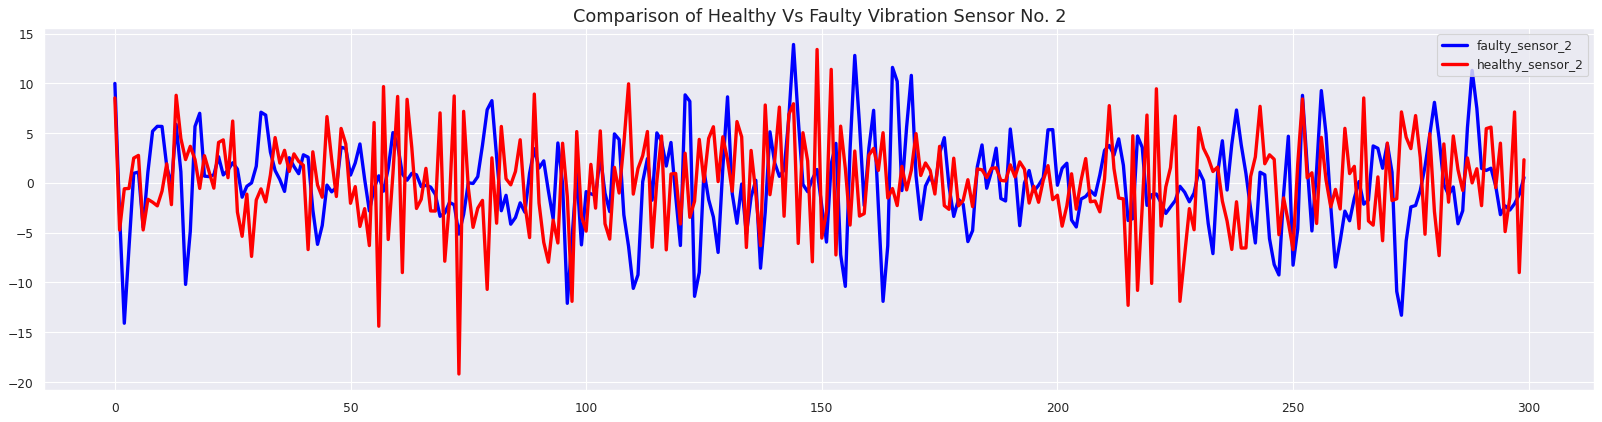

In [24]:
fig, ax = plt.subplots(figsize=(25, 6), dpi=80)
ax.plot(df_faulty['sensor_2'][:300], label='faulty_sensor_2', color='blue', animated = True, linewidth=3)
ax.plot(df_healthy['sensor_2'][:300], label='healthy_sensor_2', color='red', animated = True, linewidth=3)
plt.legend(loc='upper right')
ax.set_title('Comparison of Healthy Vs Faulty Vibration Sensor No. 2', fontsize=16)
plt.show()

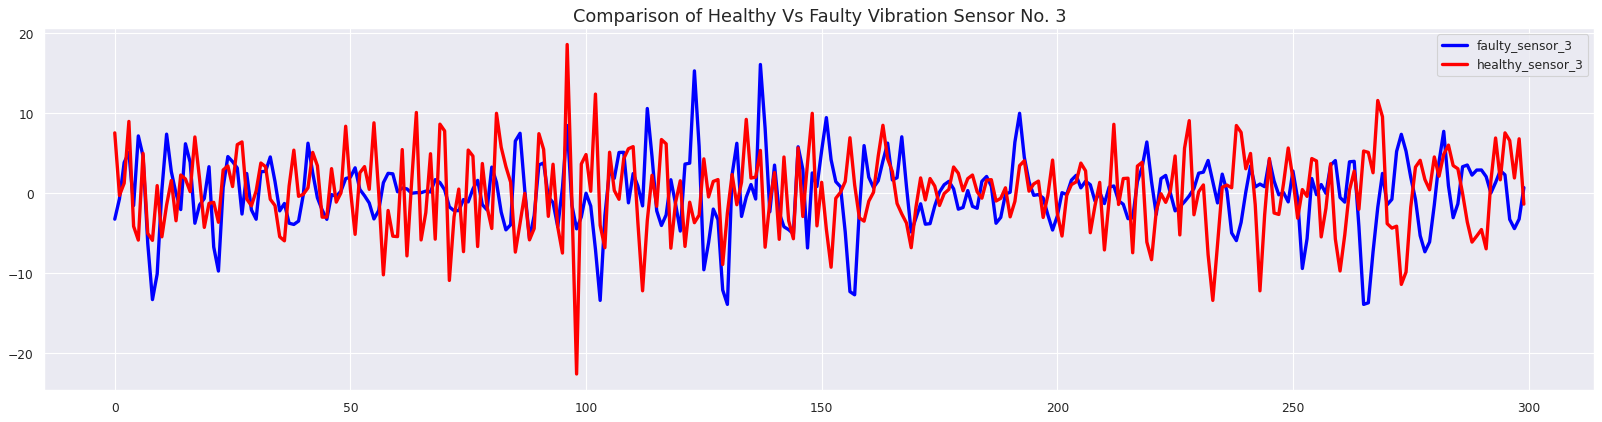

In [25]:
fig, ax = plt.subplots(figsize=(25, 6), dpi=80)
ax.plot(df_faulty['sensor_3'][:300], label='faulty_sensor_3', color='blue', animated = True, linewidth=3)
ax.plot(df_healthy['sensor_3'][:300], label='healthy_sensor_3', color='red', animated = True, linewidth=3)
plt.legend(loc='upper right')
ax.set_title('Comparison of Healthy Vs Faulty Vibration Sensor No. 3', fontsize=16)
plt.show()

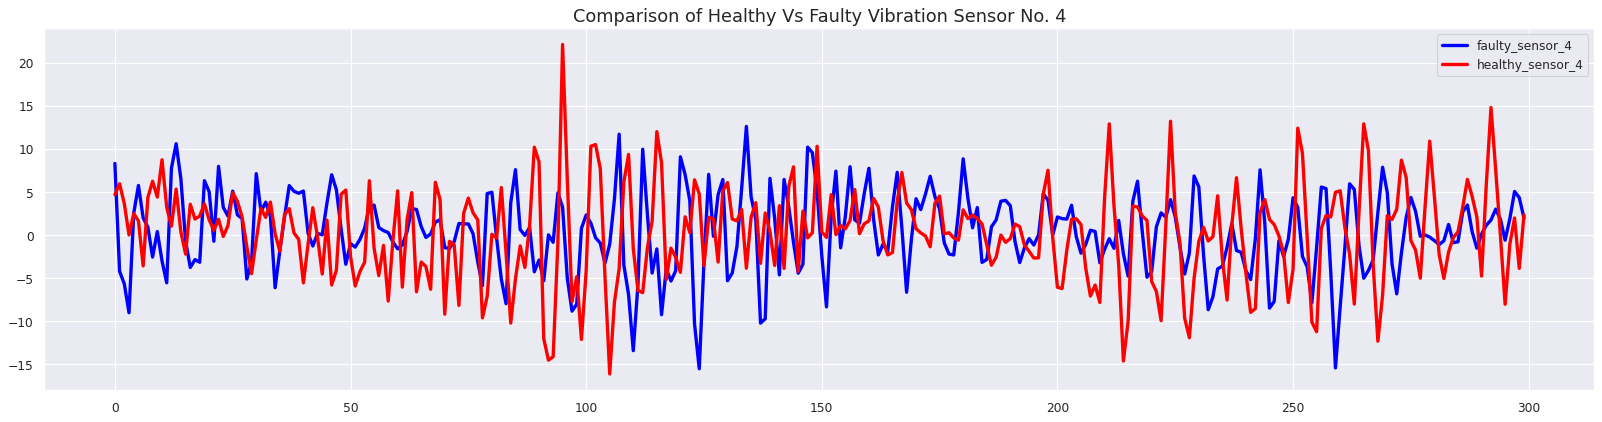

In [26]:
fig, ax = plt.subplots(figsize=(25, 6), dpi=80)
ax.plot(df_faulty['sensor_4'][:300], label='faulty_sensor_4', color='blue', animated = True, linewidth=3)
ax.plot(df_healthy['sensor_4'][:300], label='healthy_sensor_4', color='red', animated = True, linewidth=3)
plt.legend(loc='upper right')
ax.set_title('Comparison of Healthy Vs Faulty Vibration Sensor No. 4', fontsize=16)
plt.show()

#### It is seen from the above graphs the values of Healthy Sensors have higher freqency than the values of faulty sensors

# Define train/test data

In [117]:
# spliting the train and test data of healthy data for training
percentage = round(df_healthy.shape[0] * 0.70)
train = df_healthy.iloc[:percentage,:4]
test = df_healthy.iloc[percentage:,:4]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (69887, 4)
Test dataset shape: (29952, 4)


In [118]:
train

,sensor_1,sensor_2,sensor_3,sensor_4
0,-9.940,8.5300,7.550,4.7000
1,21.400,-4.7400,-0.278,5.9500
2,8.520,-0.5930,1.260,3.6400
3,-21.100,-0.5580,8.980,0.0193
4,3.840,2.4900,-4.130,2.5000
...,...,...,...,...
69882,-4.840,-0.0938,-0.823,1.4600
69883,-0.180,0.3500,-0.753,2.2600
69884,1.560,4.2100,0.816,0.9820
69885,0.452,3.9900,-0.190,1.5200


#### Visualisation of all healthy sensors in one graph 

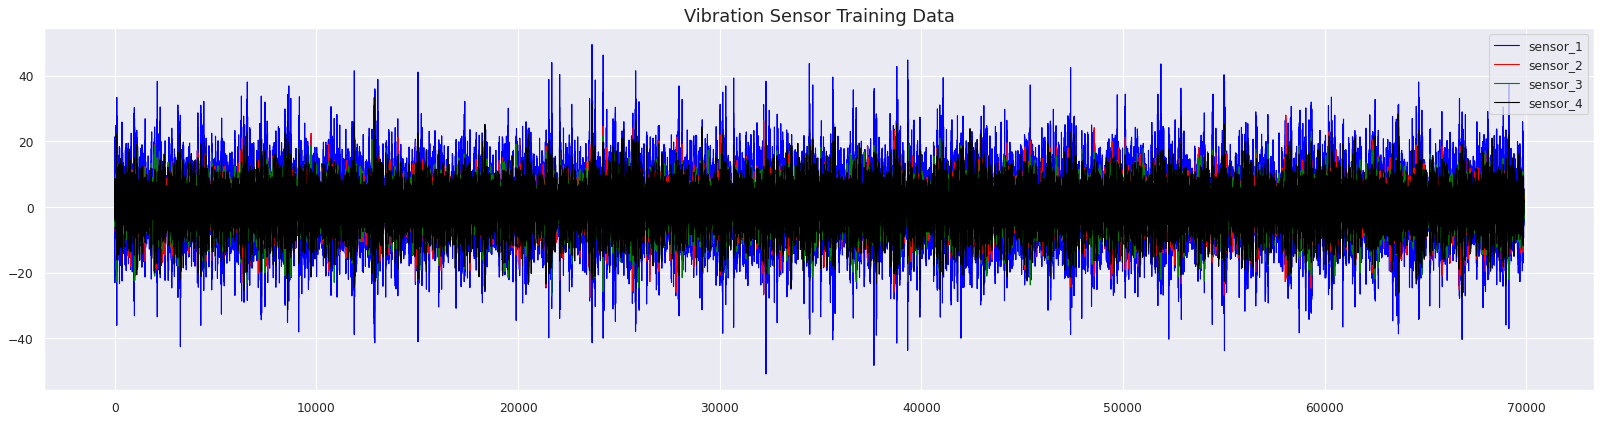

In [119]:
fig, ax = plt.subplots(figsize=(25, 6), dpi=80)
ax.plot(train['sensor_1'], label='sensor_1', color='blue', animated = True, linewidth=1)
ax.plot(train['sensor_2'], label='sensor_2', color='red', animated = True, linewidth=1)
ax.plot(train['sensor_3'], label='sensor_3', color='green', animated = True, linewidth=1)
ax.plot(train['sensor_4'], label='sensor_4', color='black', animated = True, linewidth=1)
plt.legend(loc='upper right')
ax.set_title('Vibration Sensor Training Data', fontsize=16)
plt.show()

#### Visualisation of all faulty sensors in one graph 

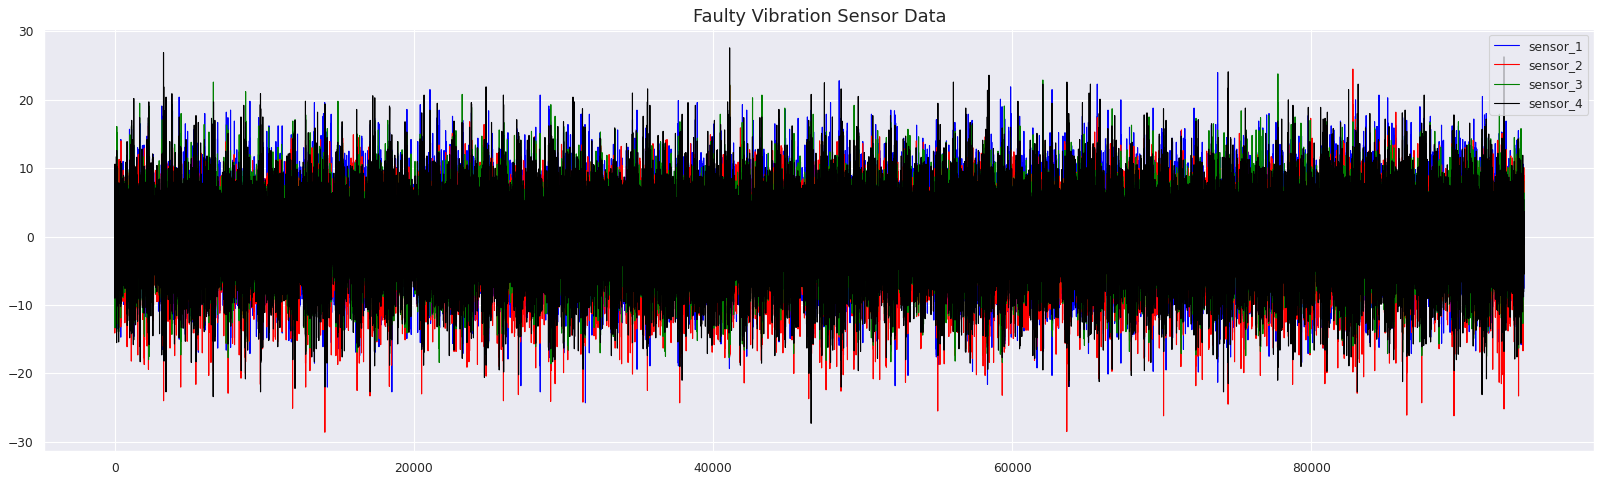

In [120]:
fig, ax = plt.subplots(figsize=(25, 7), dpi=80)
ax.plot(df_faulty['sensor_1'], label='sensor_1', color='blue', animated = True, linewidth=1)
ax.plot(df_faulty['sensor_2'], label='sensor_2', color='red', animated = True, linewidth=1)
ax.plot(df_faulty['sensor_3'], label='sensor_3', color='green', animated = True, linewidth=1)
ax.plot(df_faulty['sensor_4'], label='sensor_4', color='black', animated = True, linewidth=1)
plt.legend(loc='upper right')
ax.set_title('Faulty Vibration Sensor Data', fontsize=16)
plt.show()

## Let’s get a different perspective of the data by transforming the sensor data from the time domain to the frequency domain using a discrete Fourier transform.

In [121]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(train)
test_fft = np.fft.fft(test)

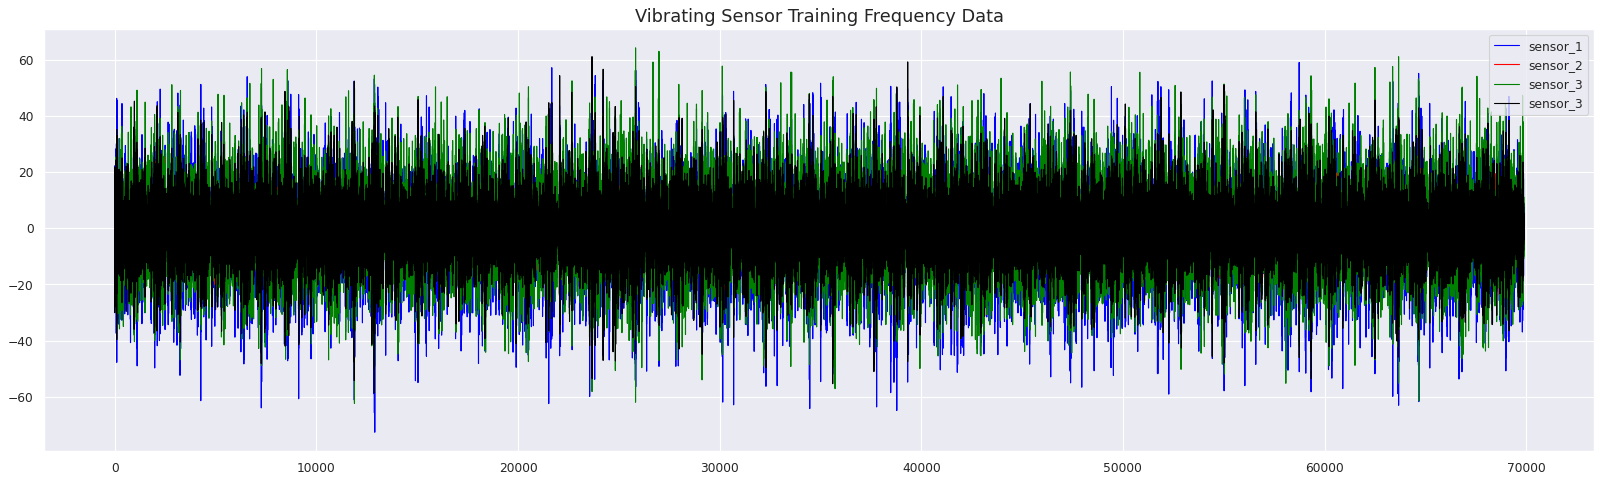

In [122]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(25, 7), dpi=80)
ax.plot(train_fft[:,0].real, label='sensor_1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='sensor_2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='sensor_3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[:,3].real, label='sensor_3', color='black', animated = True, linewidth=1)
plt.legend(loc='upper right')
ax.set_title('Vibrating Sensor Training Frequency Data', fontsize=16)
plt.show()

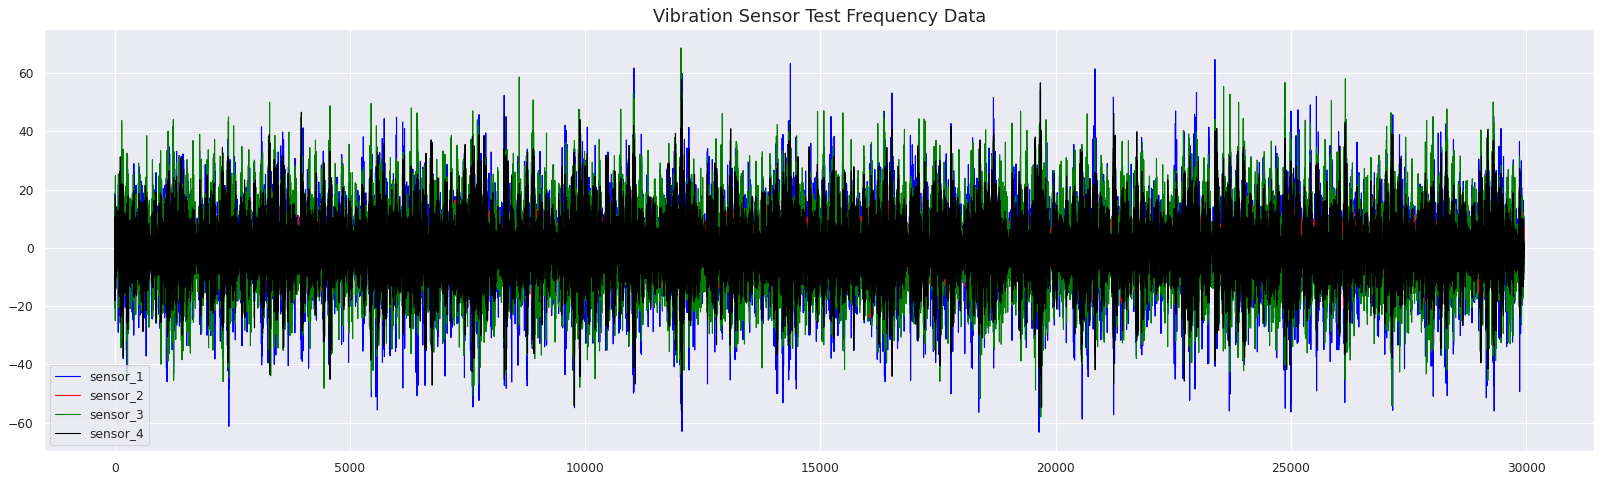

In [123]:
# frequencies of the degrading sensor signal
fig, ax = plt.subplots(figsize=(25, 7), dpi=80)
ax.plot(test_fft[:,0].real, label='sensor_1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='sensor_2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='sensor_3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='sensor_4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Vibration Sensor Test Frequency Data', fontsize=16)
plt.show()

In [124]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [125]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (69887, 1, 4)
Test data shape: (29952, 1, 4)


In [126]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [127]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 16)             1344      
                                                                 
 lstm_5 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_7 (LSTM)               (None, 1, 16)             1344      
                                                           

In [128]:
# fit the model to the data
nb_epochs = 10
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/10
6640/6640 [==============================] - 96s 14ms/step - loss: 0.0144 - val_loss: 0.0066
Epoch 2/10
6640/6640 [==============================] - 89s 13ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 3/10
6640/6640 [==============================] - 93s 14ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 4/10
6640/6640 [==============================] - 91s 14ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 5/10
6640/6640 [==============================] - 89s 13ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 6/10
6640/6640 [==============================] - 91s 14ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 7/10
6640/6640 [==============================] - 90s 14ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 8/10
6640/6640 [==============================] - 91s 14ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/10
6640/6640 [==============================] - 89s 13ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 10/10
6640/6640 [==============================] - 92s 14m

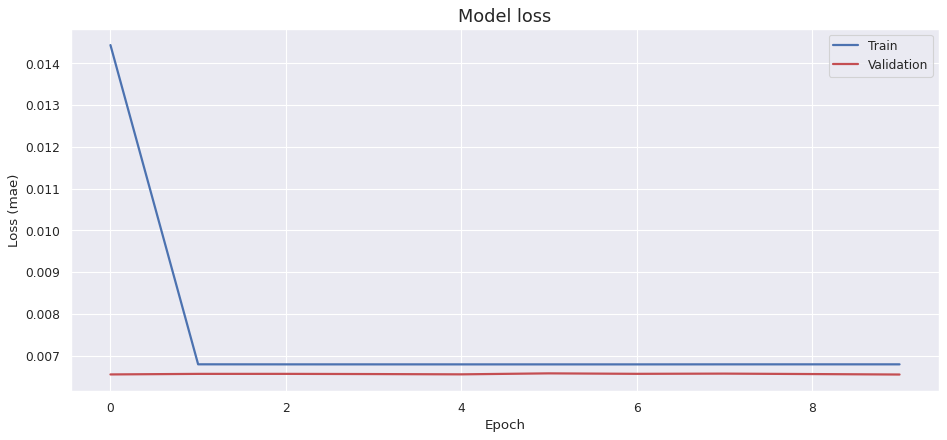

In [129]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

# Distribution of Loss Function

#### By plotting the distribution of the calculated loss in the training set, we can use this to identify a suitable threshold value for identifying an faulty sensor. In doing this, we can make sure that this threshold is set above the “noise level” and that any flagged faulty sensor should be statistically significant above the background noise.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

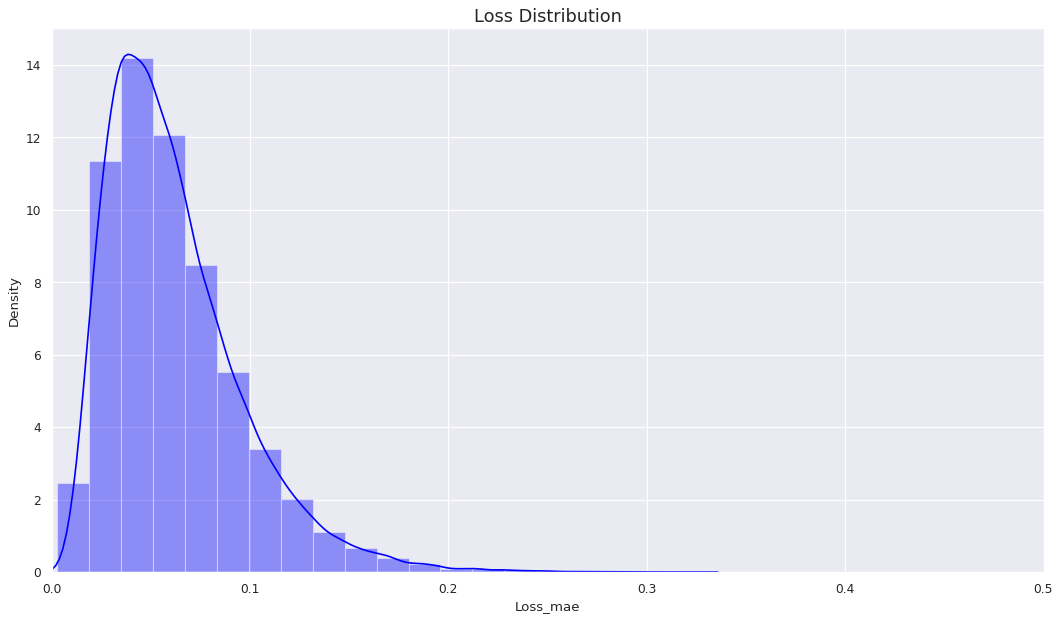

In [130]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

#### From the above loss distribution, let's try a threshold value of 0.275 for flagging an faulty. We can then calculate the loss in the test set to check when the output crosses the faulty threshold.

In [132]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.275
scored['faulty'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,faulty
69887,0.038583,0.275,False
69888,0.064588,0.275,False
69889,0.080193,0.275,False
69890,0.108281,0.275,False
69891,0.061140,0.275,False


In [133]:
# calculate the same metrics for the training set and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.275
scored_train['Faulty'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

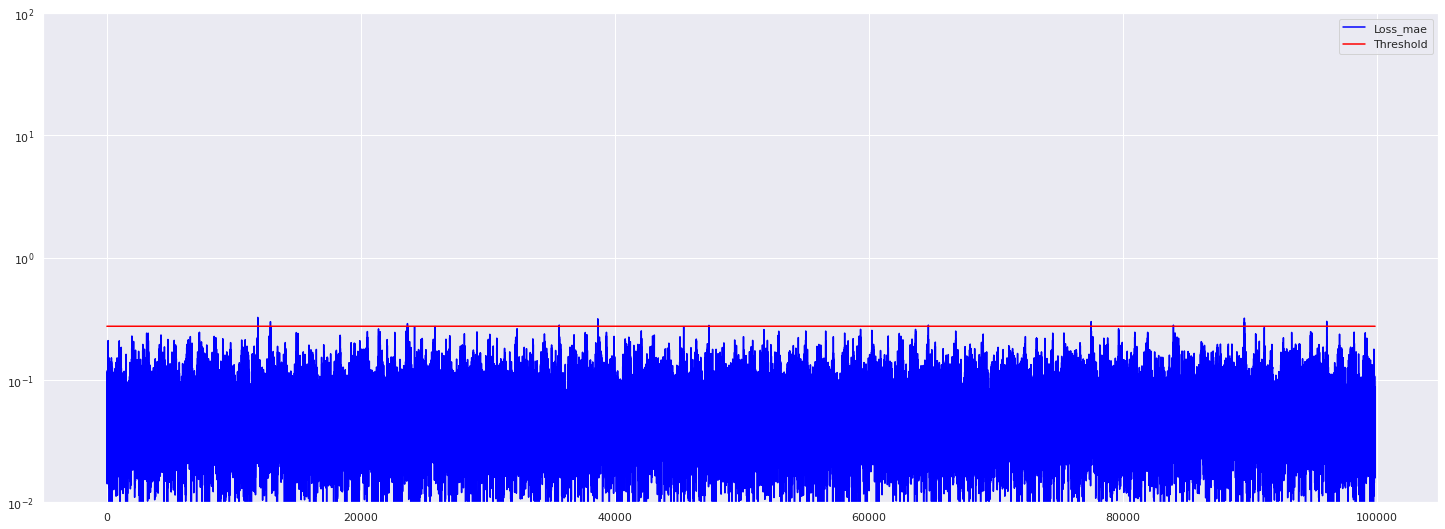

In [134]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(25,9),ylim=[1e-2,1e2],  color=['blue','red'])

#### This analysis approach is able to flag the upcoming sensor malfunction well in advance of the actual physical failure. It is important to define a suitable threshold value for flagging fault while avoiding too many false positives during normal operating conditions.

In [135]:
scored_train[scored_train['Faulty'] == True]

,Loss_mae,Threshold,Faulty
11878,0.324873,0.275,True
12876,0.299944,0.275,True
23661,0.289033,0.275,True
23670,0.275863,0.275,True
35609,0.281048,0.275,True
38644,0.316321,0.275,True
47398,0.279644,0.275,True
64669,0.280949,0.275,True


In [136]:
# save all model information, including weights, in h5 format
model.save("Cloud_model.h5")
print("Model saved")

Model saved


### Predict the Faulty Vibrate Sensor

In [179]:
test_data = df_faulty.sample(10)
test_data.reset_index(drop=True, inplace=True)
test_data_4 = test_data.iloc[:, :4]
scaler = MinMaxScaler()
test_data_scaled = scaler.fit_transform(test_data_4)
test_data_scaled = test_data_scaled.reshape(test_data_scaled.shape[0], 1, test_data_scaled.shape[1])
pred_test = model.predict(test_data_scaled)
pred_test = pred_test.reshape(pred_test.shape[0], pred_test.shape[2])
pred_test = pd.DataFrame(pred_test, columns=test_data_4.columns)
pred_test['Faulty'] = test_data.target.values
df_score = pd.DataFrame(index=test_data.index)
df_score['Loss_mae'] = np.mean(np.abs(pred_test-test_data), axis = 1)
df_score['Threshold'] = 0.275
df_score['Faulty'] = np.where(df_score['Loss_mae'] > df_score['Threshold'], 0, 1)
f1_score(df_score['Faulty'], pred_test['Faulty'], average='macro') * 100

100.0

### Predict the Healthy Vibrate Sensors

In [180]:
test_data = df_healthy.sample(10)
test_data.reset_index(drop=True, inplace=True)
test_data_4 = test_data.iloc[:, :4]
scaler = MinMaxScaler()
test_data_scaled = scaler.fit_transform(test_data_4)
test_data_scaled = test_data_scaled.reshape(test_data_scaled.shape[0], 1, test_data_scaled.shape[1])
pred_test = model.predict(test_data_scaled)
pred_test = pred_test.reshape(pred_test.shape[0], pred_test.shape[2])
pred_test = pd.DataFrame(pred_test, columns=test_data_4.columns)
pred_test['Faulty'] = test_data.target.values
df_score = pd.DataFrame(index=test_data.index)
df_score['Loss_mae'] = np.mean(np.abs(pred_test-test_data), axis = 1)
df_score['Threshold'] = 0.275
df_score['Faulty'] = np.where(df_score['Loss_mae'] > df_score['Threshold'], 1,0)
f1_score(df_score['Faulty'], pred_test['Faulty'], average='macro') * 100

100.0

#### **F1 Score is 100% for both the Healthy and Faulty vibrate sensors are able to predict correctly, Hence we can deploy  the model.**

In [138]:
test_faulty = df_faulty.iloc[:100, :4]

In [139]:
scaler = MinMaxScaler()
test_faulty_scaled = scaler.fit_transform(test_faulty)

In [140]:
test_faulty_scaled = test_faulty_scaled.reshape(test_faulty_scaled.shape[0], 1, test_faulty_scaled.shape[1])

In [141]:
pred_test_faulty = model.predict(test_faulty_scaled)

In [142]:
pred_test_faulty = pred_test_faulty.reshape(pred_test_faulty.shape[0], pred_test_faulty.shape[2])

In [143]:
pred_test_faulty.shape

(100, 4)

In [144]:
pred_test_faulty = pd.DataFrame(pred_test_faulty, columns=test_faulty.columns)

In [145]:
pred_test_faulty['Faulty'] = 0

In [146]:
scored_test_faluty = pd.DataFrame(index=test_faulty.index)


In [147]:
scored_test_faluty['Loss_mae'] = np.mean(np.abs(pred_test_faulty-test_faulty), axis = 1)


In [148]:
scored_test_faluty['Threshold'] = 0.275
scored_test_faluty['Faulty'] = np.where(scored_test_faluty['Loss_mae'] > scored_test_faluty['Threshold'], 0, 1)

In [149]:
scored_test_faluty

,Loss_mae,Threshold,Faulty
0,5.744699,0.275,0
1,3.821022,0.275,0
2,7.140301,0.275,0
3,5.569208,0.275,0
4,3.030449,0.275,0
...,...,...,...
95,0.897086,0.275,0
96,7.294208,0.275,0
97,5.324272,0.275,0
98,3.549914,0.275,0


In [150]:
scored_test_faluty.Faulty.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [151]:
pred_test_faulty.Faulty.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
accuracy_score(scored_test_faluty['Faulty'], pred_test_faulty['Faulty'])

1.0

In [153]:
f1_score(scored_test_faluty['Faulty'], pred_test_faulty['Faulty'],average='micro')

1.0

1.0

1.0